In [ ]:
#5 percent - 64-128-128-64
#4.5 percent - 64-64 - 3.15 - 0.944
#4.7 percent - 64-128-256-128-64- 0.979
#4.9 percent - 6-32-32-1 0.977
#5.8 percent - 6-32-64-64-32-1 

In [1]:
import sklearn
import keras
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from keras.layers import Dense, Input
from keras.models import Model
from tensorflow.keras.layers import Dense,Activation,Dropout,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import pandas as pd
import numpy as np
import glob
import os
import math
from random import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

In [3]:
data = pd.read_csv(r'C:\Users\harik\OneDrive\Documents\Python\Graphene\data_1.csv',delimiter=",")
data = data.dropna()
data = data.drop_duplicates()
data = data.sample(frac = 1, random_state = 10)
data.shape

(436, 5)

In [4]:
data.head()

,CO,T,CS,FS,FT
494,60.0,1000.0,0.5,54.70,54.70
331,45.0,600.0,0.2,55.25,55.25
201,30.0,600.0,0.2,49.67,49.67
565,35.0,0.0,0.2,63.00,63.00
402,45.0,750.0,0.3,49.20,49.20


In [74]:
scaler_lat = MinMaxScaler()
scaler_temp = MinMaxScaler()
scaler_crack = MinMaxScaler()
scaler_fs = MinMaxScaler()
scaler_co = MinMaxScaler()
data.CO = scaler_co.fit_transform(data[['CO']])
data.CS = scaler_crack.fit_transform(data[['CS']])
data.FS = scaler_fs.fit_transform(data[['FS']])
data.T = scaler_temp.fit_transform(data[['T']])

In [75]:
data.to_csv('new_data.csv')
train, test = train_test_split(data, test_size=0.2, random_state = 1)
#train_or, test_or = train_test_split(data1, test_size=0.2, random_state = 1)

In [76]:
test_x = test[['T', 'CS', 'CO']]
test_y = test['FS']
train_x = train[['T', 'CS', 'CO']]
train_y = train['FS']

In [77]:
test_x.shape

(88, 3)

# Linear Regression

In [78]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
  
regr.fit(train_x, train_y)
print(regr.score(test_x, test_y))
y_pred = regr.predict(test_x).reshape(-1,1)
print(mean_absolute_error(y_pred, test_y), r2_score(y_pred, test_y))
test_y_np = np.array(test_y)
test_y_np = test_y_np.reshape(-1,1)
y_pred_in = scaler_fs.inverse_transform(y_pred)
y_test_in = scaler_fs.inverse_transform(test_y_np)

#y_pred_in = scaler_lat.inverse_transform(y_pred)
#y_test_in = scaler_lat.inverse_transform(test_y_np)

print(mean_absolute_error(y_pred_in, y_test_in), r2_score(y_pred_in, y_test_in))

print(mean_absolute_percentage_error(y_test_in, y_pred_in)*100)

0.5562063412798659
0.06285929175396375 0.11867693276006952
15.421898638917469 0.1186769327600693
22.335617691907725


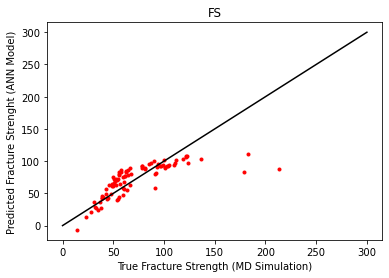

In [79]:
t = []
k = y_test_in.shape
for i in range(0, k[0]):
    p = (float)(y_pred_in[i])
    m = (float)(y_test_in[i])
    k = [p, m] 
    t.append(k)
t = np.array(t)
#print(t)
import matplotlib.pyplot as plt
plt.scatter(y_test_in, y_pred_in, marker = '.', c = "red")
plt.xlabel('True Fracture Strength (MD Simulation)')
plt.ylabel('Predicted Fracture Strenght (ANN Model)')
plt.title('FS')
plt.plot([0,300], [0, 300], color = 'black')
plt.show()

# Polynomial Regression

In [80]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False) #change degree here
X, y = data[["T", "CO", "CS"]], data["FS"]
poly_features =  poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.2, random_state=42)

In [81]:
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train, y_train)
y_pred = poly_reg_model.predict(X_test).reshape(-1,1)
print(mean_absolute_error(y_pred, y_test), r2_score(y_pred, y_test))
print(poly_reg_model.score(X_test, y_test))
test_y_np = np.array(y_test)
test_y_np = test_y_np.reshape(-1,1)
y_pred_in = scaler_fs.inverse_transform(y_pred)
y_test_in = scaler_fs.inverse_transform(test_y_np)

#y_pred_in = scaler_lat.inverse_transform(y_pred)
#y_test_in = scaler_lat.inverse_transform(test_y_np)

print(mean_absolute_error(y_pred_in, y_test_in), r2_score(y_pred_in, y_test_in))

print(mean_absolute_percentage_error(y_test_in, y_pred_in)*100)

0.0579631532428313 0.6545886543535903
0.6940933504102945
14.220680016596232 0.6545886543535901
32.06597424799758


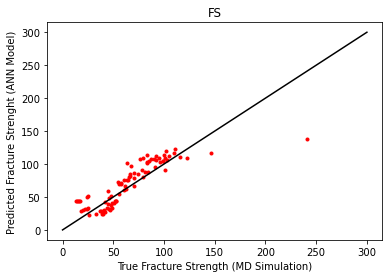

In [82]:
t = []
k = y_test_in.shape
for i in range(0, k[0]):
    p = (float)(y_pred_in[i])
    m = (float)(y_test_in[i])
    k = [p, m] 
    t.append(k)
t = np.array(t)
#print(t)
import matplotlib.pyplot as plt
plt.scatter(y_test_in, y_pred_in, marker = '.', c = "red")
plt.xlabel('True Fracture Strength (MD Simulation)')
plt.ylabel('Predicted Fracture Strenght (ANN Model)')
plt.title('FS')
plt.plot([0,300], [0, 300], color = 'black')
plt.show()

# Decision Tree Regressor

In [83]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor 
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(train_x, train_y)
y_pred = regressor.predict(test_x).reshape(-1,1)
print(mean_absolute_error(y_pred, test_y), r2_score(y_pred, test_y))
test_y_np = np.array(test_y)
test_y_np = test_y_np.reshape(-1,1)
y_pred_in = scaler_fs.inverse_transform(y_pred)
y_test_in = scaler_fs.inverse_transform(test_y_np)

#y_pred_in = scaler_lat.inverse_transform(y_pred)
#y_test_in = scaler_lat.inverse_transform(test_y_np)

print(mean_absolute_error(y_pred_in, y_test_in), r2_score(y_pred_in, y_test_in))

print(mean_absolute_percentage_error(y_test_in, y_pred_in)*100)

0.01658722608884146 0.946136694583951
4.069510048636365 0.946136694583951
4.770177169875409


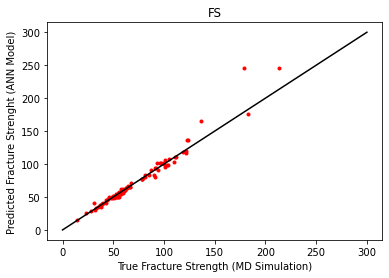

In [84]:
t = []
k = y_test_in.shape
for i in range(0, k[0]):
    p = (float)(y_pred_in[i])
    m = (float)(y_test_in[i])
    k = [p, m] 
    t.append(k)
t = np.array(t)
#print(t)
import matplotlib.pyplot as plt
plt.scatter(y_test_in, y_pred_in, marker = '.', c = "red")
plt.xlabel('True Fracture Strength (MD Simulation)')
plt.ylabel('Predicted Fracture Strenght (ANN Model)')
plt.title('FS')
plt.plot([0,300], [0, 300], color = 'black')
plt.show()

# Random Forest Regressor

In [85]:
from sklearn.ensemble import RandomForestRegressor
 
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 200, random_state = 0)
# fit the regressor with X and Y data
regressor.fit(train_x, train_y)
y_pred = regressor.predict(test_x).reshape(-1,1)
print(mean_absolute_error(y_pred, test_y), r2_score(y_pred, test_y))
test_y_np = np.array(test_y)
test_y_np = test_y_np.reshape(-1,1)
y_pred_in = scaler_fs.inverse_transform(y_pred)
y_test_in = scaler_fs.inverse_transform(test_y_np)

#y_pred_in = scaler_lat.inverse_transform(y_pred)
#y_test_in = scaler_lat.inverse_transform(test_y_np)

print(mean_absolute_error(y_pred_in, y_test_in), r2_score(y_pred_in, y_test_in))

print(mean_absolute_percentage_error(y_test_in, y_pred_in)*100)

0.013849643592680554 0.948810436739402
3.3978715590282476 0.948810436739402
3.927081550139532


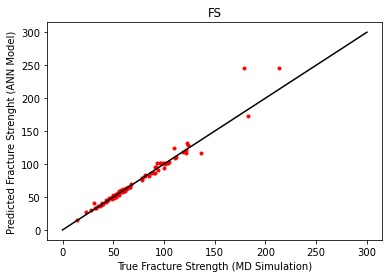

In [86]:
t = []
k = y_test_in.shape
for i in range(0, k[0]):
    p = (float)(y_pred_in[i])
    m = (float)(y_test_in[i])
    k = [p, m] 
    t.append(k)
t = np.array(t)
#print(t)
import matplotlib.pyplot as plt
plt.scatter(y_test_in, y_pred_in, marker = '.', c = "red")
plt.xlabel('True Fracture Strength (MD Simulation)')
plt.ylabel('Predicted Fracture Strenght (ANN Model)')
plt.title('FS')
plt.plot([0,300], [0, 300], color = 'black')
plt.show()

# Xgboost

In [87]:
from xgboost import XGBRegressor
 # create regressor object
    
regressor = XGBRegressor()
#regressor = RandomForestRegressor(n_estimators = 200, random_state = 0)
# fit the regressor with X and Y data
regressor.fit(train_x, train_y)
y_pred = regressor.predict(test_x).reshape(-1,1)
print(mean_absolute_error(y_pred, test_y), r2_score(y_pred, test_y))
test_y_np = np.array(test_y)
test_y_np = test_y_np.reshape(-1,1)
y_pred_in = scaler_fs.inverse_transform(y_pred)
y_test_in = scaler_fs.inverse_transform(test_y_np)

#y_pred_in = scaler_lat.inverse_transform(y_pred)
#y_test_in = scaler_lat.inverse_transform(test_y_np)

print(mean_absolute_error(y_pred_in, y_test_in), r2_score(y_pred_in, y_test_in))

print(mean_absolute_percentage_error(y_test_in, y_pred_in)*100)

0.011912083197044131 0.9553902138460519
2.9225100396920776 0.9553902088822214
3.2876386966151117


[[ 55.6284523   54.7       ]
 [ 55.41279602  55.25      ]
 [ 52.20975113  49.67      ]
 [ 62.79375839  63.        ]
 [ 49.40813065  49.2       ]
 [110.52780914 110.        ]
 [102.42089844  93.12      ]
 [117.10920715 118.955     ]
 [102.56536102  98.6       ]
 [245.51156616 213.37      ]
 [ 40.17174911  30.8       ]
 [ 39.17990875  38.8       ]
 [ 48.54528427  47.66      ]
 [ 83.83740997  80.82639204]
 [100.22296906 100.749     ]
 [ 44.05389023  44.        ]
 [ 43.97223663  42.88      ]
 [ 75.12301636  78.12      ]
 [ 50.05853271  50.05      ]
 [100.45666504  99.93      ]
 [ 59.73226547  61.8       ]
 [244.92782593 179.01      ]
 [ 65.0943222   66.15      ]
 [ 95.94891357  89.7       ]
 [102.51046753  97.5       ]
 [123.53380585 121.47      ]
 [ 91.72942352  92.6       ]
 [ 59.79291534  60.2       ]
 [101.08734894 103.        ]
 [ 46.86274338  45.84      ]
 [ 57.29657745  57.        ]
 [ 65.69304657  66.5       ]
 [ 61.19725037  64.6       ]
 [136.15783691 122.667     ]
 [101.1415329 

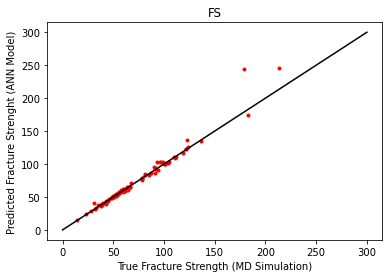

In [88]:
t = []
k = y_test_in.shape
for i in range(0, k[0]):
    p = (float)(y_pred_in[i])
    m = (float)(y_test_in[i])
    k = [p, m] 
    t.append(k)
t = np.array(t)
print(t)
import matplotlib.pyplot as plt
plt.scatter(y_test_in, y_pred_in, marker = '.', c = "red")
plt.xlabel('True Fracture Strength (MD Simulation)')
plt.ylabel('Predicted Fracture Strenght (ANN Model)')
plt.title('FS')
plt.plot([0,300], [0, 300], color = 'black')
plt.show()

# SVM Regressor

In [65]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'linear')
regressor.fit(train_x, train_y)
y_pred = regressor.predict(test_x).reshape(-1,1)
print(mean_absolute_error(y_pred, test_y), r2_score(y_pred, test_y))
test_y_np = np.array(test_y)
test_y_np = test_y_np.reshape(-1,1)
y_pred_in = scaler_fs.inverse_transform(y_pred)
y_test_in = scaler_fs.inverse_transform(test_y_np)

#y_pred_in = scaler_lat.inverse_transform(y_pred)
#y_test_in = scaler_lat.inverse_transform(test_y_np)

print(mean_absolute_error(y_pred_in, y_test_in), r2_score(y_pred_in, y_test_in))

print(mean_absolute_percentage_error(y_test_in, y_pred_in)*100)

0.05396820594851103 0.42437182861378253
13.2405596474077 0.4243718286137824
23.177800385675187


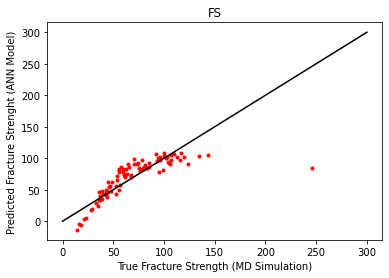

In [66]:
t = []
k = y_test_in.shape
for i in range(0, k[0]):
    p = (float)(y_pred_in[i])
    m = (float)(y_test_in[i])
    k = [p, m] 
    t.append(k)
t = np.array(t)
#print(t)
import matplotlib.pyplot as plt
plt.scatter(y_test_in, y_pred_in, marker = '.', c = "red")
plt.xlabel('True Fracture Strength (MD Simulation)')
plt.ylabel('Predicted Fracture Strenght (ANN Model)')
plt.title('FS')
plt.plot([0,300], [0, 300], color = 'black')
plt.show()

# KNN Regression

In [67]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
rmse_val = [] #to store rmse values for different k
for K in range(50):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(train_x, train_y)  #fit the model
    y_pred=model.predict(test_x) #make prediction on test set
    error = sqrt(mean_squared_error(test_y,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.11656812056327326
RMSE value for k=  2 is: 0.09892097160005617
RMSE value for k=  3 is: 0.08606029444456821
RMSE value for k=  4 is: 0.09404401618887118
RMSE value for k=  5 is: 0.09747308144531457
RMSE value for k=  6 is: 0.09864385203649104
RMSE value for k=  7 is: 0.09348323876922494
RMSE value for k=  8 is: 0.09306966304592768
RMSE value for k=  9 is: 0.08831397898691375
RMSE value for k=  10 is: 0.09306252360030642
RMSE value for k=  11 is: 0.08614745476763123
RMSE value for k=  12 is: 0.08341357383786
RMSE value for k=  13 is: 0.08265695809708676
RMSE value for k=  14 is: 0.08377954569761477
RMSE value for k=  15 is: 0.08350373168929151
RMSE value for k=  16 is: 0.08181706526489159
RMSE value for k=  17 is: 0.08148909521601025
RMSE value for k=  18 is: 0.08343995833946745
RMSE value for k=  19 is: 0.0840565889911436
RMSE value for k=  20 is: 0.08423959865563227
RMSE value for k=  21 is: 0.08380925863538281
RMSE value for k=  22 is: 0.08372419446364886
R

<AxesSubplot:>

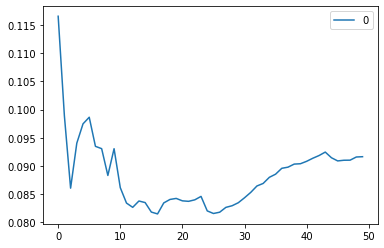

In [68]:
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [69]:
model = neighbors.KNeighborsRegressor(n_neighbors = 13)

model.fit(train_x, train_y)  #fit the model
y_pred=model.predict(test_x).reshape(-1,1) #make prediction on test set

print(mean_absolute_error(y_pred, test_y), r2_score(y_pred, test_y))
test_y_np = np.array(test_y)
test_y_np = test_y_np.reshape(-1,1)
y_pred_in = scaler_fs.inverse_transform(y_pred)
y_test_in = scaler_fs.inverse_transform(test_y_np)

#y_pred_in = scaler_lat.inverse_transform(y_pred)
#y_test_in = scaler_lat.inverse_transform(test_y_np)

print(mean_absolute_error(y_pred_in, y_test_in), r2_score(y_pred_in, y_test_in))

print(mean_absolute_percentage_error(y_test_in, y_pred_in)*100)

0.04535104459937428 0.4393998844607523
11.126425282010489 0.4393998844607523
15.498449160155015


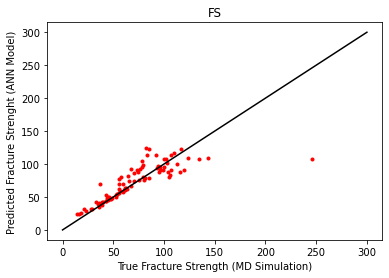

In [70]:
t = []
k = y_test_in.shape
for i in range(0, k[0]):
    p = (float)(y_pred_in[i])
    m = (float)(y_test_in[i])
    k = [p, m] 
    t.append(k)
t = np.array(t)
#print(t)
import matplotlib.pyplot as plt
plt.scatter(y_test_in, y_pred_in, marker = '.', c = "red")
plt.xlabel('True Fracture Strength (MD Simulation)')
plt.ylabel('Predicted Fracture Strenght (ANN Model)')
plt.title('FS')
plt.plot([0,300], [0, 300], color = 'black')
plt.show()

# DNN Model

In [90]:
path = r'C:/Users/harik/OneDrive/Documents/Python/Graphene/ANN/6_layer_64-64-32-32-16-8/'
os.chdir(path)
os.getcwd()

'C:\\Users\\harik\\OneDrive\\Documents\\Python\\Graphene\\ANN\\6_layer_64-64-32-32-16-8'

In [91]:
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [92]:
y_pred = loaded_model.predict(test_x)
print(mean_absolute_error(y_pred, test_y), r2_score(y_pred, test_y))
test_y_np = np.array(test_y)
test_y_np = test_y_np.reshape(-1,1)
y_pred_in = scaler_fs.inverse_transform(y_pred)
y_test_in = scaler_fs.inverse_transform(test_y_np)

#y_pred_in = scaler_lat.inverse_transform(y_pred)
#y_test_in = scaler_lat.inverse_transform(test_y_np)

print(mean_absolute_error(y_pred_in, y_test_in), r2_score(y_pred_in, y_test_in))

print(mean_absolute_percentage_error(y_test_in, y_pred_in)*100)

0.002454926777164982 0.9976753244084317
0.6022919797665687 0.9976753259301187
1.0572896510278311


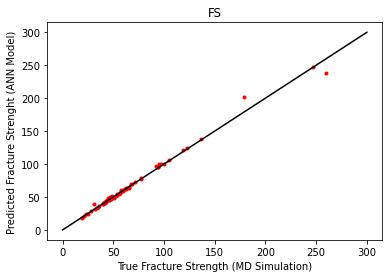

In [31]:
t = []
k = y_test_in.shape
for i in range(0, k[0]):
    p = (float)(y_pred_in[i])
    m = (float)(y_test_in[i])
    k = [p, m] 
    t.append(k)
t = np.array(t)
#print(t)
import matplotlib.pyplot as plt
plt.scatter(y_test_in, y_pred_in, marker = '.', c = "red")
plt.xlabel('True Fracture Strength (MD Simulation)')
plt.ylabel('Predicted Fracture Strenght (ANN Model)')
plt.title('FS')
plt.plot([0,300], [0, 300], color = 'black')
plt.show()

# End of Module-Extra sections

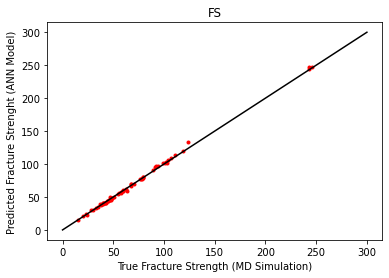

In [163]:
import matplotlib.pyplot as plt
plt.scatter(y_test_in, y_pred_in, marker = '.', c = "red")
plt.xlabel('True Fracture Strength (MD Simulation)')
plt.ylabel('Predicted Fracture Strenght (ANN Model)')
plt.title('FS')
plt.plot([0,300], [0, 300], color = 'black')
plt.show()

In [34]:
model_json = model.to_json()
with open("model_2.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_2.h5")
print("Saved model to disk")

Saved model to disk


In [37]:
# convert the history.history dict to a pandas DataFrame:     
hist_df_1 = pd.DataFrame(history_1.history) 
hist_df_2 = pd.DataFrame(history_2.history)
hist_df_3 = pd.DataFrame(history_3.history)
hist_df = hist_df_1.append(hist_df_2, ignore_index = True)
hist_df = hist_df.append(hist_df_3, ignore_index = True)
# or save to csv: 
hist_csv_file = 'history_2.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)
    
file1 = open("info_2.txt","a")
file1.write("Learning rate = 0.00005 for 200 train test split = 0.20 loss = mae \n")
file1.write("Learning rate = 0.00001 for 100 train test split = 0.20 loss = mae \n")
file1.write("Learning rate = 0.000005 for 100 train test split = 0.20 loss = mae \n")
file1.close()

In [38]:
from keras.models import model_from_json
json_file = open('model_2.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model_2.h5")
print("Loaded model from disk")

Loaded model from disk


In [39]:
y_pred = loaded_model.predict(test_x)
print(mean_absolute_error(y_pred, test_y), r2_score(y_pred, test_y))
test_y_np = np.array(test_y)
test_y_np = test_y_np.reshape(-1,1)
y_pred_in = scaler_fs.inverse_transform(y_pred)
y_test_in = scaler_fs.inverse_transform(test_y_np)
from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(y_test_in, y_pred_in))
print(mean_absolute_error(y_pred_in, y_test_in), r2_score(y_pred_in, y_test_in))

0.009516710203451817 0.9905244277011236
0.028568718188526746
2.3348291135347807 0.9905244311459185


In [40]:
loaded_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 8)                 32        
_________________________________________________________________
dense_37 (Dense)             (None, 32)                288       
_________________________________________________________________
dense_38 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_39 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_40 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_41 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_42 (Dense)             (None, 64)               

In [141]:
test_x_in = test_x.copy()
test_x_in.LO = scaler_lat.inverse_transform(test_x_in[['LO']])
test_x_in.CS = scaler_crack.inverse_transform(test_x_in[['CS']])
test_x_in.T = scaler_temp.inverse_transform(test_x_in[['T']]) 

In [142]:
test_x_in

,LO,T,CS
26,0.0,300.0,0.8
86,13.9,600.0,0.5
54,13.9,0.0,0.0
12,0.0,100.0,0.3
65,13.9,100.0,0.2
50,0.0,1200.0,0.5
49,0.0,1200.0,0.4
40,0.0,900.0,0.4
68,13.9,100.0,0.5
20,0.0,300.0,0.2


In [64]:
test_x = test_data[['LO', 'T', 'CS']]
test_y = test_data['FS']
train_x = data[['LO', 'T', 'CS']]
train_y = data['FS']

In [36]:
import scikeras
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# define base model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=3, kernel_initializer='normal', activation='relu'))
    model.add(Dense(32, kernel_initializer='normal', activation='relu'))
    model.add(Dense(64,  kernel_initializer='normal', activation='relu'))
    model.add(Dense(128,  kernel_initializer='normal', activation='relu'))
    #model.add(Dense(128,  kernel_initializer='normal', activation='relu'))
    model.add(Dense(64,  kernel_initializer='normal', activation='relu'))
    model.add(Dense(32, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid')))
    # Compile model
    model.compile(loss='mean_absolute_error', optimizer='adam', metrics = ['mae', 'mse'])
    return model


estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=2, verbose=0)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator,X= train_x, y = train_y, cv=kfold)
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))

D:\ananconda3\lib\site-packages\scikeras\wrappers.py:289: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
D:\ananconda3\lib\site-packages\scikeras\wrappers.py:289: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
D:\ananconda3\lib\site-packages\scikeras\wrappers.py:289: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


KeyboardInterrupt: 